## Dataset:  lsd.csv

---

Source: Wagner, Agahajanian, and Bing (1968). Correlation of Performance
Test Scores with Tissue Concentration of Lysergic Acid Diethylamide in
Human Subjects. Clinical Pharmacology and Therapeutics, Vol.9 pp635-638.

Description: Group of volunteers was given LSD, their mean scores on
math exam and tissue concentrations of LSD were obtained at n=7 time points.

Variables/Columns

TC: Tissue Concentration   1-4

SCORE: Math Score          8-12



---

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the data

lsd = pd.read_csv('Data/lsd.csv')
lsd[:5].T

,0,1,2,3,4
tc,1.17,2.97,3.26,4.69,5.83
score,78.93,58.20,67.47,37.47,45.65


In [3]:
lsd.shape

(7, 2)

In [4]:
lsd.describe().T

,count,mean,std,min,25%,50%,75%,max
tc,7.0,4.332857,1.935413,1.17,3.115,4.69,5.915,6.41
score,7.0,50.087143,18.610854,29.97,35.195,45.65,62.835,78.93


In [5]:
# Assign the data to X and y
# Note: Sklearn requires a 7 x 1 array of values
# so we use reshape to create this

X = lsd.tc.values.reshape(-1,1)
y = lsd.score.values.reshape(-1,1)

print('Shape:', X.shape, y.shape)

Shape: (7, 1) (7, 1)


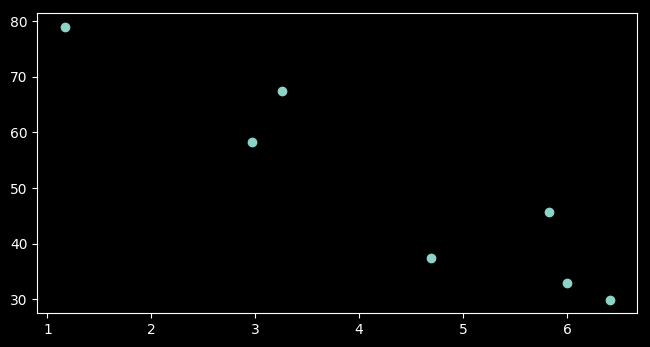

In [7]:
# Plot the data

fig = plt.figure(figsize=(6,3), dpi=100)
axes = fig.add_axes([0,0,1,1])
axes = plt.style.use('dark_background')
axes = plt.scatter(X,y)
plt.show()

In [8]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [9]:
# Fit the model to the data. 
# Note: This is the training step where you fit the line to the data.

model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
# Print the coefficient and the intercept for the model

print('Weight coefficient:', model.coef_)
print('y-axis intercept:', model.intercept_)

Weight coefficient: [[-9.00946642]]
y-axis intercept: [89.12387377]


In [11]:
# Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print('X min value:', x_min)
print('X max value:', x_max)

X min value: [[1.17]]
X max value: [[6.41]]


In [12]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)
print('y min value:', y_min)
print('y max value:', y_max)

y min value: [[78.58279806]]
y max value: [[31.37319405]]


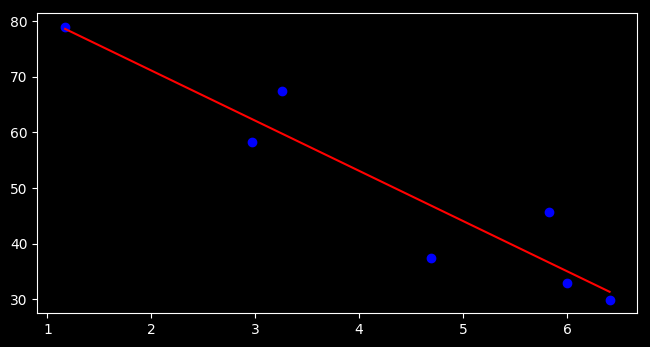

In [13]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]


fig = plt.figure(figsize=(6,3), dpi=100)
axes = fig.add_axes([0,0,1,1])
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')
plt.show()